<a href="https://colab.research.google.com/github/dbsxogh09/AI504/blob/main/ai504_02_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

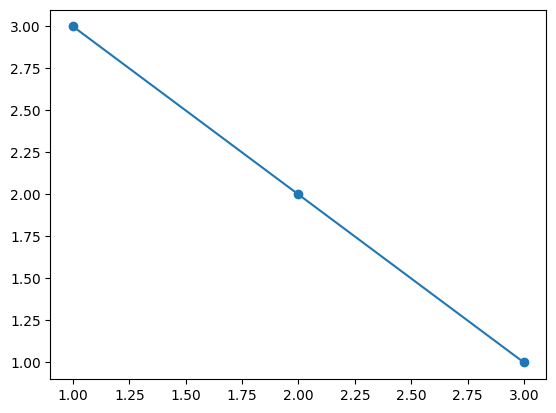

In [6]:
plt.plot([1,2,3], [3,2,1])
plt.scatter([1,2,3], [3,2,1])
plt.show()

In [26]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

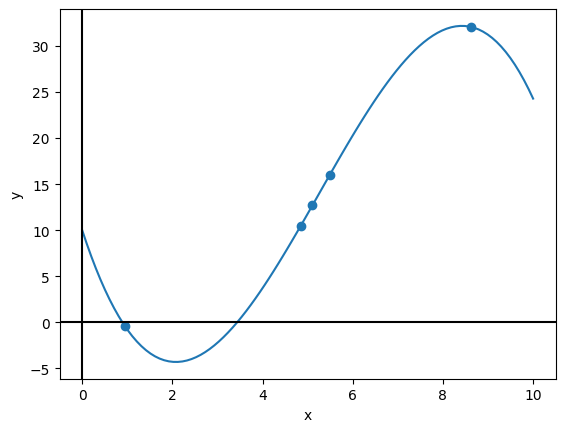

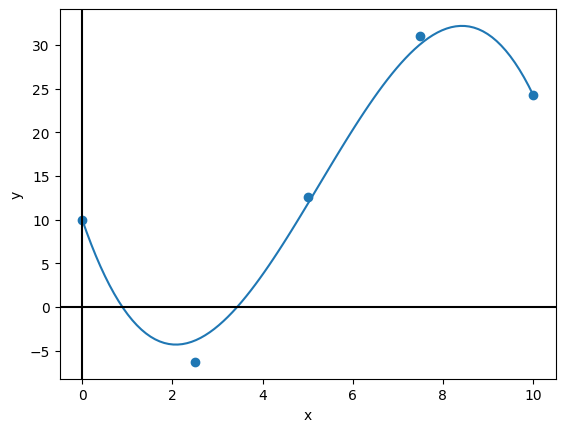

In [27]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)

# Quiz: Draw the function foo using x_line
y_line = foo(x_line)
# plt.plot(x_line,y_line)
# plt.show()

# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
x_sample = None
y_sample = None

x_sample = np.random.uniform(0,10,5)
y_sample = foo(x_sample)
draw_plot([x_line],[y_line],x_sample,y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=1 and visualize.
x_sample = None
y_sample = None

sample_size = 5
x_sample = np.linspace(0,10,sample_size)
y_sample = foo(x_sample) + np.random.normal(loc=0, scale=1, size = sample_size)
draw_plot([x_line],[y_line],x_sample,y_sample)

R^2:0.527150
[ 9.93704702 -6.28514903 12.63055701 31.05512154 24.24409534]
[ 1.12546093  7.72089765 14.31633437 20.9117711  27.50720782]
78.0381399579543


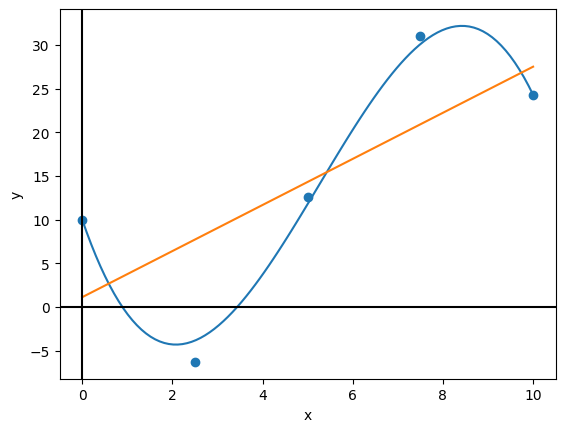

In [43]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()

# Training the linear regression model.
# matrix input needed for X => expand to matrix
lr.fit(x_sample[:, None], y_sample)

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

# Predicting data points.
y_hat = lr.predict(x_sample[:, None])

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
print(y_sample)
print(y_hat)
MSE = ((y_sample-y_hat)**2).mean()
print(MSE)


# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.

draw_plot([x_line, x_line],[y_line, lr.predict(x_line[:,None])],x_sample,y_sample)

### Linear Regression

### Polynomial Regression

[[  1.     0.     0.  ]
 [  1.     2.5    6.25]
 [  1.     5.    25.  ]
 [  1.     7.5   56.25]
 [  1.    10.   100.  ]]
[ 9.93704702 -6.28514903 12.63055701 31.05512154 24.24409534]


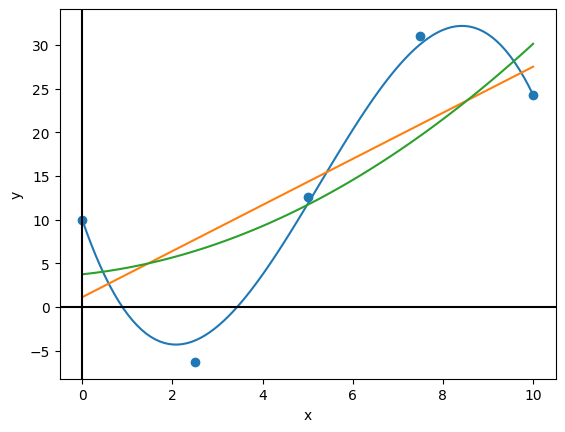

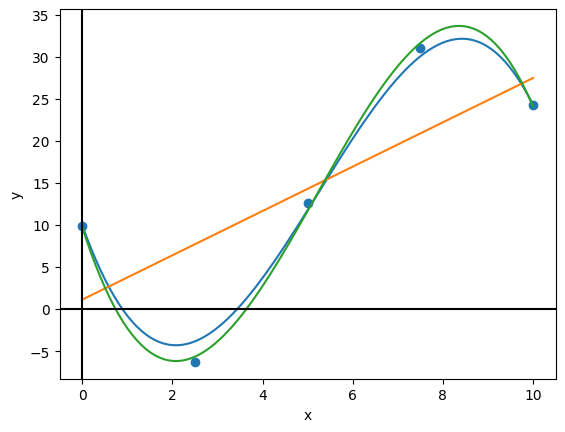

In [48]:
from sklearn.preprocessing import PolynomialFeatures

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=2)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])
print(x_sample_poly)
# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)
print(y_sample)
# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_poly_line = poly.fit_transform(x_line[:,None])
pr_line = pr.predict(x_poly_line)
draw_plot([x_line, x_line, x_line], [y_line, lr.predict(x_line[:,None]), pr_line], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

poly = PolynomialFeatures(degree=3)
x_sample_poly = poly.fit_transform(x_sample[:, None])
pr = LinearRegression().fit(x_sample_poly, y_sample)
x_poly_line = poly.fit_transform(x_line[:,None])
pr_line = pr.predict(x_poly_line)
draw_plot([x_line, x_line, x_line], [y_line, lr.predict(x_line[:,None]), pr_line], x_sample, y_sample)

### Iris Dataset

In [49]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [50]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [62]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
# use only 2 data cause using every data makes too easy
logistic.fit(X_train[:, :2], y_train)
print(logistic.score(X_test[:,:2], y_test))

# Quiz: Import Support Vector Machine, then train SVM
from sklearn import svm
svmclf = svm.SVC(C=1.0, kernel = 'poly', degree=3)
svmclf.fit(X_train[:, :2], y_train)
print(svmclf.score(X_test[:,:2],y_test))

# Quiz: Import Decision Tree, then train DT
from sklearn import tree
dtclf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234)
dtclf = dtclf.fit(X_train[:,:2], y_train)
print(dtclf.score(X_test[:,:2],y_test))

0.7333333333333333
0.7333333333333333
0.5666666666666667


In [64]:
# Quiz: Use the model's predict() to calculate the test accuracy.
logistic.predict(X_test[:,:2])

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [ ]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

[1 2 1 2 0 2 0 2 2 2 2 2 2 2 2 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0]


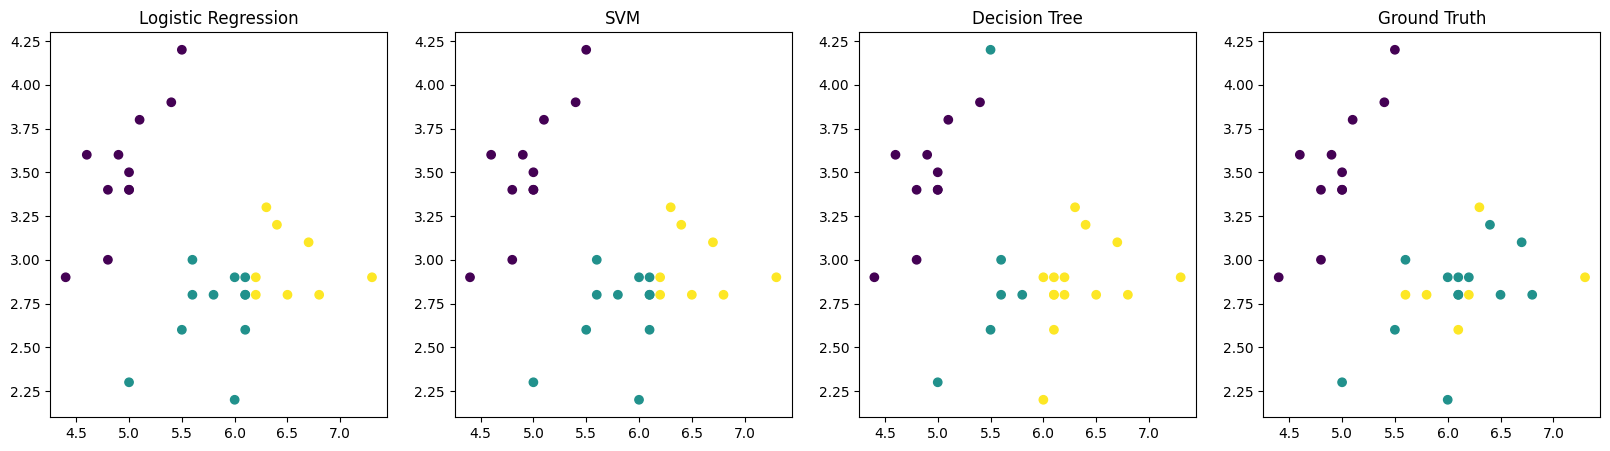

In [81]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)
y_logistic = logistic.predict(X_test[:,:2])
y_svc = svmclf.predict(X_test[:,:2])
y_dt = dtclf.predict(X_test[:,:2])

print(y_dt)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:,0], X_test[:,1], c=y_logistic)

plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:,0], X_test[:,1], c=y_svc)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:,0], X_test[:,1], c=y_dt)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)